In [1]:
%pip install mediapipe opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [3]:
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
cap.set(cv2.CAP_PROP_FPS, 30)

while cap.isOpened():
    ret, frame = cap.read()
    
    # Flip the frame horizontally to disable mirroring
    frame = cv2.flip(frame, 1)
    
    cv2.imshow('media pipe', frame)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
    # Check if the window is closed
    if cv2.getWindowProperty('media pipe', cv2.WND_PROP_VISIBLE) < 1:
        break
        
cap.release()
cv2.destroyAllWindows()

In [4]:
print(cap)

< cv2.VideoCapture 00000283AB011030>


In [5]:
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
cap.set(cv2.CAP_PROP_FPS, 30)
with mp_pose.Pose(min_detection_confidence = 0.5,min_tracking_confidence = 0.5) as pose:
    
    while cap.isOpened():
        ret, frame = cap.read()
    
        # Flip the frame horizontally to disable mirroring
        frame = cv2.flip(frame, 1)
        
        image = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        results = pose.process(image)
        
        image.flags.writeable = True
        image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
        
        mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_pose.POSE_CONNECTIONS)
        
        cv2.imshow('media pipe', image)
    
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        
        # Check if the window is closed
        if cv2.getWindowProperty('media pipe', cv2.WND_PROP_VISIBLE) < 1:
            break
        
    cap.release()
    cv2.destroyAllWindows()

# JOINTS

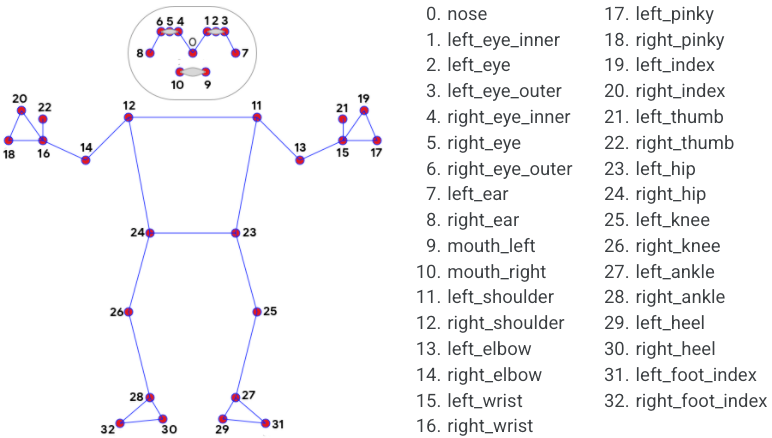

In [6]:
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
cap.set(cv2.CAP_PROP_FPS, 30)
with mp_pose.Pose(min_detection_confidence = 0.5,min_tracking_confidence = 0.5) as pose:
    
    while cap.isOpened():
        ret, frame = cap.read()
    
        # Flip the frame horizontally to disable mirroring
        frame = cv2.flip(frame, 1)
        
        image = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        results = pose.process(image)
        
        image.flags.writeable = True
        image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
        try:
            landmarks = results.pose_landmarks.landmark
            print(landmarks)
        except:
            pass
        
        mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_pose.POSE_CONNECTIONS)
        
        cv2.imshow('media pipe', image)
    
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        
        # Check if the window is closed
        if cv2.getWindowProperty('media pipe', cv2.WND_PROP_VISIBLE) < 1:
            break
        
    cap.release()
    cv2.destroyAllWindows()

[x: 0.41018954
y: 0.8086514
z: -1.180571
visibility: 0.9981717
, x: 0.4454227
y: 0.7428919
z: -1.1633732
visibility: 0.99825543
, x: 0.46731672
y: 0.7414466
z: -1.1636815
visibility: 0.9981457
, x: 0.48579854
y: 0.74089897
z: -1.1639941
visibility: 0.9976997
, x: 0.38117522
y: 0.7460755
z: -1.1346507
visibility: 0.99820185
, x: 0.36269712
y: 0.7461233
z: -1.1345886
visibility: 0.9981299
, x: 0.34722418
y: 0.7464285
z: -1.1349332
visibility: 0.9981541
, x: 0.51948565
y: 0.74405444
z: -0.77311146
visibility: 0.9987463
, x: 0.33373034
y: 0.75348485
z: -0.6277787
visibility: 0.9988054
, x: 0.45733428
y: 0.8668694
z: -1.0083114
visibility: 0.99701774
, x: 0.38075253
y: 0.875589
z: -0.9694406
visibility: 0.99759763
, x: 0.66749215
y: 0.95909685
z: -0.45961124
visibility: 0.9571328
, x: 0.2557236
y: 0.95845956
z: -0.16706176
visibility: 0.9804319
, x: 0.7893123
y: 1.0142932
z: -0.8508976
visibility: 0.29679614
, x: 0.05335328
y: 1.2334799
z: -0.465279
visibility: 0.46630174
, x: 0.74081326
y:

In [5]:
len(landmarks)

33

In [6]:
landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value]

x: 0.65414333
y: 0.97681075
z: -0.20564675
visibility: 0.9776129

In [7]:
 landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value]

x: 0.8180933
y: 1.1265813
z: -0.91277695
visibility: 0.56168216

In [8]:
 landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value]

x: 0.6717478
y: 1.0489093
z: -1.5428777
visibility: 0.57758915

# ANGLE CALCULATION

In [12]:
def calangle(a,b,c):
    a = np.array(a)
    b = np.array(b)
    c = np.array(c)
    
    rad = np.arctan2(c[1]-b[1],c[0]-b[0]) - np.arctan2(a[1]-b[1],a[0]-b[0])
    angle = np.abs(rad*180.0/np.pi)
    
    if angle > 180.0:
        angle = 360 - angle
        
    return angle

In [13]:
shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

In [13]:
calangle(shoulder,elbow,wrist)

155.41723165995725

In [15]:
elbow

[0.7956744432449341, 1.2217711210250854]

In [7]:
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
counter = 0
stage = None
cap.set(cv2.CAP_PROP_FPS, 30)
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:

    while cap.isOpened():
        ret, frame = cap.read()

        # Flip the frame horizontally to disable mirroring
        frame = cv2.flip(frame, 1)

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        results = pose.process(image)

        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        try:
            landmarks = results.pose_landmarks.landmark
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,
                        landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,
                     landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,
                     landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

            angle = calangle(shoulder, elbow, wrist)

            cv2.putText(image, str(angle), tuple(np.multiply(elbow, [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

            if angle > 160:
                stage = 'down'
            if angle < 30 and stage == 'down':
                stage = 'up'
                counter += 1
                print(counter)

        except:
            pass
        
        # Draw filled rectangle for 'REPS' text
        cv2.rectangle(image, (0, 0), (150, 73), (245, 117, 16), -1)
        cv2.putText(image, 'REPS', (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter), (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 0), 2, cv2.LINE_AA)
        
        # Draw filled rectangle for 'STAGE' text
        cv2.rectangle(image, (image.shape[1] - 225, 0), (image.shape[1], 73), (245, 117, 16), -1)
        cv2.putText(image, 'STAGE', (image.shape[1] - 160, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
        cv2.putText(image, stage, (image.shape[1] - 165, 60), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 0), 2, cv2.LINE_AA)

        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        cv2.imshow('media pipe', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

        # Check if the window is closed
        if cv2.getWindowProperty('media pipe', cv2.WND_PROP_VISIBLE) < 1:
            break

    cap.release()
    cv2.destroyAllWindows()
